<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Constants" data-toc-modified-id="Imports-and-Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Constants</a></span></li><li><span><a href="#Inspecting-a-single-TFRecord-file" data-toc-modified-id="Inspecting-a-single-TFRecord-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inspecting a single TFRecord file</a></span></li><li><span><a href="#Basic-band-analysis-of-a-single-image" data-toc-modified-id="Basic-band-analysis-of-a-single-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic band analysis of a single image</a></span></li><li><span><a href="#Band-Analysis-of-All-Images" data-toc-modified-id="Band-Analysis-of-All-Images-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Band Analysis of All Images</a></span></li><li><span><a href="#Plot-images-with-most-bad-pixels" data-toc-modified-id="Plot-images-with-most-bad-pixels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot images with most bad pixels</a></span></li></ul></div>

**Analysis of LSMS dataset**
- Calculates statistics about each image band in the LSMS dataset
- Plots the images with the greatest number of bad pixels
- The means and standard deviations for the LSMS dataset in `batchers/dataset_constants.py` come from the output of this notebook.

Prerequisite:
- Run `preprocessing/process_tfrecords_lsms.ipynb`.

## Imports and Constants

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pprint import pprint
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../')
from batchers import batcher, dataset_constants
from preprocessing.helper import (
    get_first_feature_map,
    get_feature_types,
    print_scalar_values,
    analyze_tfrecord_batch,
    print_analysis_results)
from utils.plot import plot_image_by_band 

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

DATASET_NAME = 'LSMS'
BAND_ORDER = ['BLUE', 'GREEN', 'RED', 'SWIR1', 'TEMP1', 'SWIR2', 'NIR', 'NIGHTLIGHTS']
BAND_ORDER_NLSPLIT = ['BLUE', 'GREEN', 'RED', 'SWIR1', 'TEMP1', 'SWIR2', 'NIR', 'DMSP', 'VIIRS']

MEANS = batcher.MEANS_DICT[DATASET_NAME]
STD_DEVS = batcher.STD_DEVS_DICT[DATASET_NAME]

print('Means:')
pprint(MEANS)
print()

print('Std Devs:')
pprint(STD_DEVS)

CID_TO_C = {
    'et': 'ethiopia',
    'mw': 'malawi',
    'ng': 'nigeria',
    'tz': 'tanzania',
    'ug': 'uganda',
}

Means:
{'BLUE': 0.062551,
 'DMSP': 5.105815,
 'GREEN': 0.090696,
 'NIR': 0.256701,
 'RED': 0.10564,
 'SWIR1': 0.242577,
 'SWIR2': 0.165792,
 'TEMP1': 299.49528,
 'VIIRS': 0.557793}

Std Devs:
{'BLUE': 0.023979,
 'DMSP': 31.68832,
 'GREEN': 0.032121,
 'NIR': 0.059025,
 'RED': 0.051943,
 'SWIR1': 0.088163,
 'SWIR2': 0.083826,
 'TEMP1': 4.678959,
 'VIIRS': 6.421816}


In [4]:
ALL_TFRECORD_PATHS = batcher.get_lsms_tfrecord_paths(cys=dataset_constants.SURVEY_NAMES['LSMS'])
pprint(ALL_TFRECORD_PATHS[0:5])

['/atlas/u/chrisyeh/poverty_data/lsms/ethiopia_2011/481.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lsms/ethiopia_2011/482.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lsms/ethiopia_2011/483.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lsms/ethiopia_2011/484.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lsms/ethiopia_2011/485.tfrecord.gz']


## Inspecting a single TFRecord file

In [5]:
tfrecord_path = ALL_TFRECORD_PATHS[0]
feature_map = get_first_feature_map(tfrecord_path)
feature_types = get_feature_types(feature_map)

print(f'TFRecord path: {tfrecord_path}')
print('Features and types:')
pprint(feature_types)
print()
print_scalar_values(feature_map)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
TFRecord path: /atlas/u/chrisyeh/poverty_data/lsms/ethiopia_2011/481.tfrecord.gz
Features and types:
{'BLUE': ('float_list', (65025,)),
 'GREEN': ('float_list', (65025,)),
 'LAT': ('float_list', (65025,)),
 'LON': ('float_list', (65025,)),
 'NIGHTLIGHTS': ('float_list', (65025,)),
 'NIR': ('float_list', (65025,)),
 'RED': ('float_list', (65025,)),
 'SWIR1': ('float_list', (65025,)),
 'SWIR2': ('float_list', (65025,)),
 'TEMP1': ('float_list', (65025,)),
 'country': ('bytes_list', (1,)),
 'ea_id': ('float_list', (1,)),
 'id': ('float_list', (1,)),
 'lat': ('float_list', (1,)),
 'lon': ('float_list', (1,)),
 'system:index': ('bytes_list', (1,)),
 'wealthpooled': ('float_list', (1,)),
 'year': ('float_list', (1,))}

country: et
ea_id: 5010100736.0
id: 1358.0
lat: 10.498152732849121
lon: 42.59494400024414
system:index: 1359
wealthpooled: -1.2320877313613892
year: 2011.0


In [7]:
tfrecord_path = ALL_TFRECORD_PATHS[1000]
feature_map = get_first_feature_map(tfrecord_path)
feature_types = get_feature_types(feature_map)

print(f'TFRecord path: {tfrecord_path}')
print('Features and types:')
pprint(feature_types)
print()
print_scalar_values(feature_map)

TFRecord path: /atlas/u/chrisyeh/poverty_data/lsms/nigeria_2010/222.tfrecord.gz
Features and types:
{'BLUE': ('float_list', (65025,)),
 'GREEN': ('float_list', (65025,)),
 'LAT': ('float_list', (65025,)),
 'LON': ('float_list', (65025,)),
 'NIGHTLIGHTS': ('float_list', (65025,)),
 'NIR': ('float_list', (65025,)),
 'RED': ('float_list', (65025,)),
 'SWIR1': ('float_list', (65025,)),
 'SWIR2': ('float_list', (65025,)),
 'TEMP1': ('float_list', (65025,)),
 'country': ('bytes_list', (1,)),
 'ea_id': ('float_list', (1,)),
 'id': ('float_list', (1,)),
 'lat': ('float_list', (1,)),
 'lon': ('float_list', (1,)),
 'system:index': ('bytes_list', (1,)),
 'wealthpooled': ('float_list', (1,)),
 'year': ('float_list', (1,))}

country: ng
ea_id: 594.0
id: 2959.0
lat: 9.631348609924316
lon: 6.379275321960449
system:index: 2960
wealthpooled: 0.81581711769104
year: 2010.0


Explanation of each field

- `BLUE`: float, (65025,), blue
- `GREEN`: float, (65025,), green
- `LAT`: float, (65025,), latitude
- `LON`: float, (65025,), longitude
- `NIGHTLIGHTS`: float, (65025,), nightlights (VIIRS for 2012+, DMSP before 2012)
- `NIR`: float, (65025,), near infrared
- `RED`: float, (65025,), red
- `SWIR1`: float, (65025,), short-wave infrared 1
- `SWIR2`: float, (65025,), short-wave infrared 2
- `TEMP1`: float, (65025,), temperature
- `country`: str, (1,), 2-letter country code
- `ea_id`: float, (1,), enumeration area ID
- `id`: float, (1,), unique index for the given record within the TFRecord file
- `lat`: float, (1,), center latitude
- `lon`: float, (1,), center longitude
- `system:index`: bytes, (1,), ??
- `wealthpooled`: float, (1,), label
- `year`: float, (1,), year of survey

Loc: (9.631349, 6.379275), nigeria, 2010


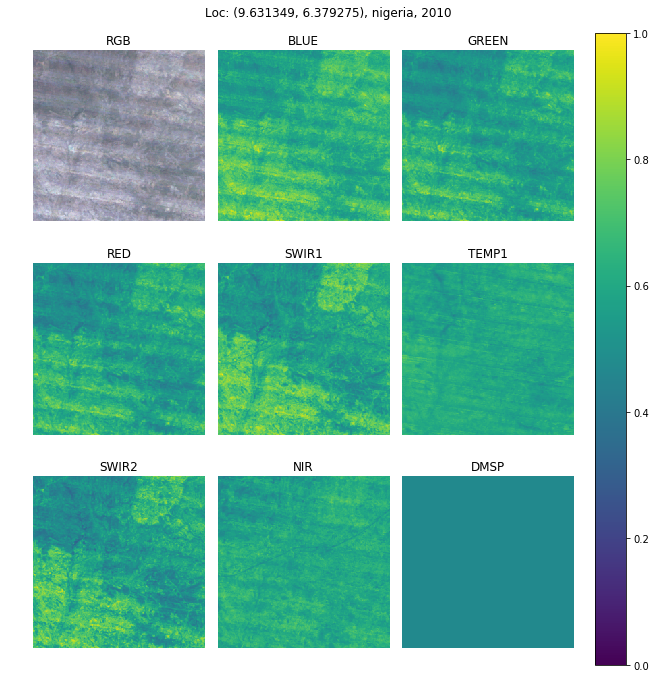

In [8]:
def year_to_nltype(year):
    return 'DMSP' if year < 2012 else 'VIIRS'

def band_keys_for_year(band_keys, year):
    '''
    Args
    - band_keys: list of str, including 'NIGHTLIGHTS'
    - year: numeric

    Returns
    - new_band_keys: copy of band_keys with 'NIGHTLIGHTS' replaced by 'DMSP' or 'VIIRS'
    '''
    new_band_keys = list(band_keys) # make a local copy
    new_band_keys[band_keys.index('NIGHTLIGHTS')] = year_to_nltype(year)
    return new_band_keys

def plot_single_img(feature_map):
    lat = np.float32(feature_map['lat'].float_list.value[0])
    lon = np.float32(feature_map['lon'].float_list.value[0])
    cid = feature_map['country'].bytes_list.value[0].decode()
    country = CID_TO_C[cid]
    year = int(feature_map['year'].float_list.value[0])
    fig_title = f'Loc: ({lat:.6f}, {lon:.6f}), {country}, {year}'
    print(fig_title)

    # choose 'DMSP' or 'VIIRS' for nightlights band name based on year
    band_keys_nl = band_keys_for_year(BAND_ORDER, year)

    img_normalized = []
    for b_idx, b_name in enumerate(BAND_ORDER):
        band = np.asarray(feature_map[b_name].float_list.value, dtype=np.float32).reshape(255, 255)
        b = band_keys_nl[b_idx]
        band = (band - MEANS[b]) / STD_DEVS[b]
        img_normalized.append(band)
    img_normalized = np.stack(img_normalized, axis=2)

    plot_image_by_band(img=img_normalized, band_order=band_keys_nl, nrows=3, title=fig_title,
                       rgb='add', colorbar=True)

plot_single_img(feature_map)

## Basic band analysis of a single image

Single Image Band Statistics
BLUE	- min: 0.0542	 max: 0.1278	 avg: 0.0838291	 std: 0.011417	 nz: 0
GREEN	- min: 0.06665	 max: 0.1701	 avg: 0.107672	 std: 0.0144759	 nz: 0
RED	- min: 0.06035	 max: 0.239	 avg: 0.131241	 std: 0.0254853	 nz: 0
SWIR1	- min: 0.1575	 max: 0.4955	 avg: 0.306318	 std: 0.0523375	 nz: 0
TEMP1	- min: 297.5	 max: 306.7	 avg: 302.34	 std: 1.02751	 nz: 0
SWIR2	- min: 0.0735	 max: 0.3923	 avg: 0.209587	 std: 0.0513656	 nz: 0
NIR	- min: 0.2198	 max: 0.3532	 avg: 0.293205	 std: 0.0167683	 nz: 0
DMSP	- min: 0	 max: 0	 avg: 0	 std: 0	 nz: 65025
Number of all-0 pixels: 0

Single Image Band Statistics - Ignoring 0 values
BLUE	- min: 0.0542	 max: 0.1278	 avg: 0.0838291	 std: 0.011417
GREEN	- min: 0.06665	 max: 0.1701	 avg: 0.107672	 std: 0.0144759
RED	- min: 0.06035	 max: 0.239	 avg: 0.131241	 std: 0.0254853
SWIR1	- min: 0.1575	 max: 0.4955	 avg: 0.306318	 std: 0.0523375
TEMP1	- min: 297.5	 max: 306.7	 avg: 302.34	 std: 1.02751
SWIR2	- min: 0.0735	 max: 0.3923	 avg: 0.209587

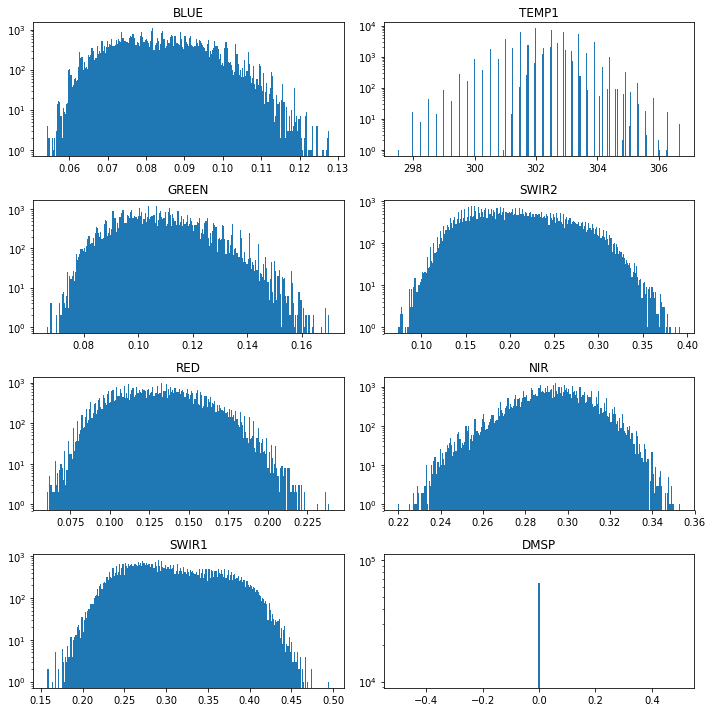

In [9]:
def single_img_band_analysis(feature_map):
    '''perform basic band analysis'''
    nbands = len(BAND_ORDER)
    nrows = int(np.ceil(nbands / 2.0))
    fig, axs = plt.subplots(nrows, 2, figsize=[10, 10])

    img = np.stack([
        np.asarray(feature_map[band].float_list.value).reshape(255, 255)
        for band in BAND_ORDER
    ], axis=2)

    # choose 'DMSP' or 'VIIRS' for nightlights band name based on year
    year = int(feature_map['year'].float_list.value[0])
    band_keys = band_keys_for_year(BAND_ORDER, year)

    print('Single Image Band Statistics')
    mins = np.min(img, axis=(0,1))
    maxs = np.max(img, axis=(0,1))
    means = np.mean(img, axis=(0,1))
    stds = np.std(img, axis=(0,1))
    nzs = np.sum(img == 0, axis=(0,1)) # number of zeros
    for i, band in enumerate(band_keys):
        print('{}\t- min: {:0.6g}\t max: {:0.6g}\t avg: {:0.6g}\t std: {:0.6g}\t nz: {}'.format(
            band, mins[i], maxs[i], means[i], stds[i], nzs[i]))
        ax = axs[i % nrows, i // nrows]
        ax.hist(img[:,:,i].flatten(), bins=255)
        ax.set_title(band)
        ax.set_yscale('log')

    # number of pixels that are entirely zero
    nz_pixels = np.sum(np.all(img == 0, axis=2))
    print('Number of all-0 pixels:', nz_pixels)

    print('')
    print('Single Image Band Statistics - Ignoring 0 values')
    for i, band in enumerate(band_keys):
        b = img[:,:,i]
        bnz = b[b > 0]
        if len(bnz) == 0:
            print(f'Band {band} is all 0')
        else:
            print('{}\t- min: {:0.6g}\t max: {:0.6g}\t avg: {:0.6g}\t std: {:0.6g}'.format(
                band, np.min(bnz), np.max(bnz), np.mean(bnz), np.std(bnz)))

    fig.tight_layout()
    plt.show()

single_img_band_analysis(feature_map)

## Band Analysis of All Images

Calculate the mean and standard deviation of each band across the entire dataset (the train, val, and test sets all merged together). This makes sense because in an actual test scenario we would have the test images, so we could include it in the statistics calculations.

We do this for 2 cases:
1. the images are read as-is
2. negative values are filled in with 0

In [10]:
lsms_batcher = batcher.Batcher(
    tfrecord_files=ALL_TFRECORD_PATHS,
    dataset=DATASET_NAME,
    batch_size=128,
    ls_bands='ms',
    nl_band='merge',
    label_name='wealthpooled',
    shuffle=False,
    augment=False,
    negatives=None,
    normalize=False
)
iter_init, batch_op = lsms_batcher.get_batch()
stats, k_worst = analyze_tfrecord_batch(
    iter_init, batch_op, total_num_images=len(ALL_TFRECORD_PATHS), nbands=len(BAND_ORDER_NLSPLIT), k=20)

Instructions for updating:
Colocations handled automatically by placer.
Finished. Processed 3020 images.
Time per batch - mean: 1.867s, std: 0.721s
Time to process each batch - mean: 3.059s, std: 0.294s
Total time: 118.382s, Num batches: 24


In [11]:
with np.printoptions(precision=6):
    pprint({k: v for k, v in stats.items() if k != 'num_good_pixels'})

{'maxs': array([2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00,
       2.000000e+00, 3.299000e+02, 2.000000e+00, 2.986428e+03,
       3.427691e+03]),
 'mins': array([-0.0029  ,  0.      ,  0.      ,  0.      , -0.0147  ,  0.      ,
        0.      ,  0.      , -0.087389]),
 'mins_goodpx': array([-0.0029  ,  0.      ,  0.      ,  0.      , -0.0147  ,  0.      ,
        0.      ,  0.      , -0.087389]),
 'mins_nz': array([1.000000e-03, 9.500000e-03, 1.400000e-03, 1.150000e-03,
       4.500000e-04, 2.747000e+02, 4.800000e-03, 1.974774e+00,
       4.479662e-07]),
 'nz_pixels': array([151518703, 151518704, 151518704, 151518704, 151518703, 151518704,
       151518704,  25107447,  68243041]),
 'sum_sqs': array([6.800192e+05, 1.402795e+06, 2.099896e+06, 1.009448e+07,
       5.229942e+06, 1.359530e+13, 1.051317e+07, 1.561106e+11,
       6.296264e+09]),
 'sums': array([9.478481e+06, 1.374324e+07, 1.600775e+07, 3.675806e+07,
       2.512274e+07, 4.538298e+10, 3.889832e+07, 7.736919e+08,
 

In [12]:
num_good_pixels = stats['num_good_pixels']
images_count = len(num_good_pixels)
print('num total pixels:', images_count*(224**2))
print('num total good pixels:', np.sum(num_good_pixels))
print('mean number of non-0 pixels in each band:', np.mean(stats['nz_pixels']))

num total pixels: 151531520
num total good pixels: 151525816
mean number of non-0 pixels in each band: 128220157.1111111


In [13]:
means, stds = print_analysis_results(stats=stats, band_order=BAND_ORDER_NLSPLIT)

Statistics including bad pixels
Band BLUE     - mean:   0.062551, std:  0.023979, min:     -0.0029, max:    2.000000
Band GREEN    - mean:   0.090696, std:  0.032121, min:           0, max:    2.000000
Band RED      - mean:   0.105640, std:  0.051943, min:           0, max:    2.000000
Band SWIR1    - mean:   0.242577, std:  0.088163, min:           0, max:    2.000000
Band TEMP1    - mean:   0.165792, std:  0.083826, min:     -0.0147, max:    2.000000
Band SWIR2    - mean: 299.495280, std:  4.678959, min:           0, max:  329.899994
Band NIR      - mean:   0.256701, std:  0.059025, min:           0, max:    2.000000
Band DMSP     - mean:   5.105815, std: 31.688320, min:           0, max: 2986.427734
Band VIIRS    - mean:   0.557793, std:  6.421816, min:   -0.087389, max: 3427.691406

Statistics ignoring any 0s and negative values
Band BLUE     - mean:   0.062557, std:  0.023973, min:       0.001, max:    2.000000, mean_nz: 50171.757812
Band GREEN    - mean:   0.090703, std:  0.03211

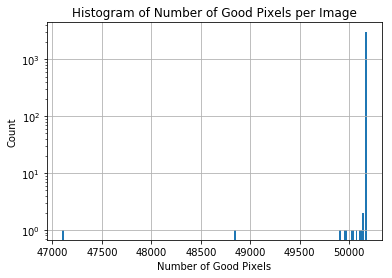

In [14]:
def hist_num_good_pixels(num_good_pixels):
    fig, ax = plt.subplots(1, 1)
    ax.hist(num_good_pixels, bins=200)
    ax.set_yscale('log')
    ax.set_xlabel('Number of Good Pixels')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Number of Good Pixels per Image')
    ax.grid(True)
    plt.show()

hist_num_good_pixels(num_good_pixels)

## Plot images with most bad pixels

In [16]:
def plot_k_top(k_top, value_str, means, stds, negate_value=False):
    '''
    Args
    - k_top: list of length k, elements are (value, (label, year, loc, image))
    - value_str: str
    - means: dict
    - stds: dict
    - negate_value: bool
    '''
    values, datas = zip(*k_top)
    values = np.asarray(values)
    if negate_value:
        values = -values

    pprint(values)
    labels, years, locs, images = zip(*datas)

    for i, img in enumerate(images):
        loc, label, value, year = locs[i], labels[i], values[i], years[i]
        band_order_nl = band_keys_for_year(BAND_ORDER, year)
        img_normalized = np.zeros_like(img)
        for b, band_name in enumerate(band_order_nl):
            img_normalized[:,:,b] = (img[:,:,b] - means[band_name]) / stds[band_name]
        fig_title = 'loc: ({:0.6f}, {:0.6f})   label: {:0.6f}   {}: {:0.6g}'.format(
            loc[0], loc[1], label, value_str, value)
        plot_image_by_band(img_normalized, band_order=band_order_nl, nrows=1, title=fig_title, rgb='merge')

array([50176, 50176, 50176, 50176, 50175, 50172, 50164, 50161, 50140,
       50133, 50128, 50109, 50081, 50052, 50025, 49966, 49949, 49908,
       48850, 47099])


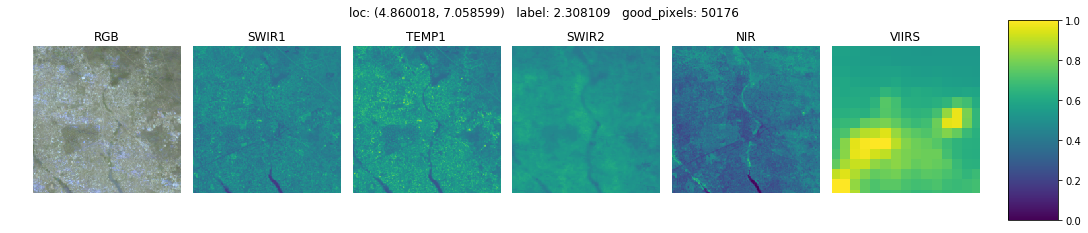

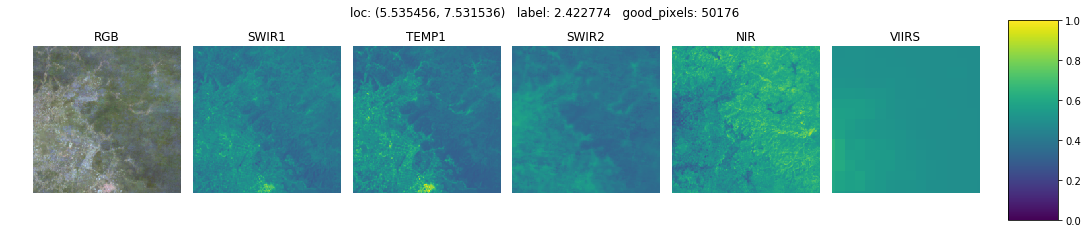

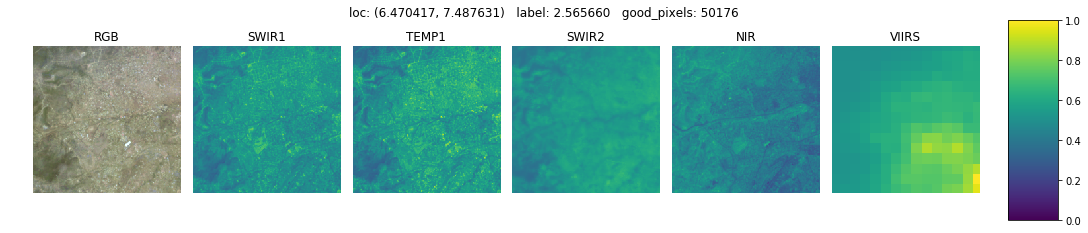

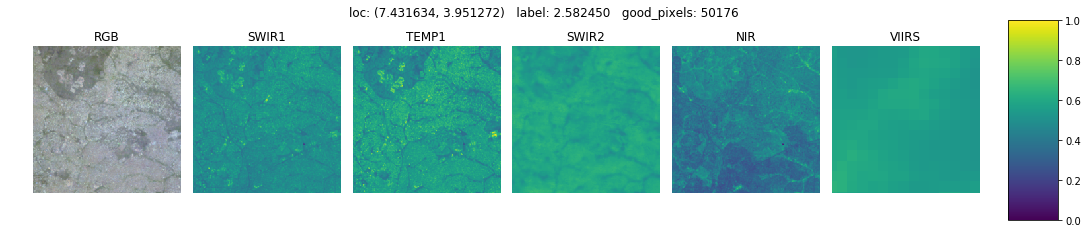

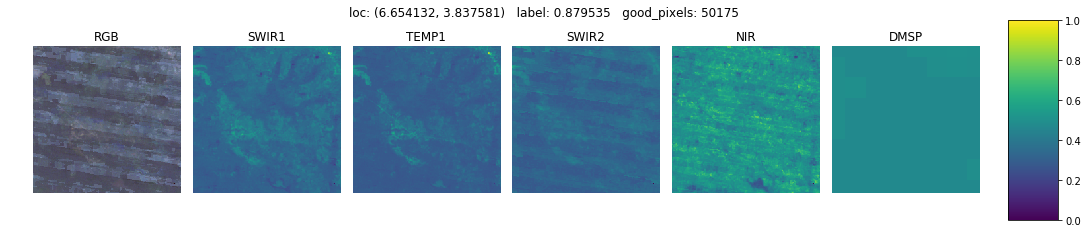

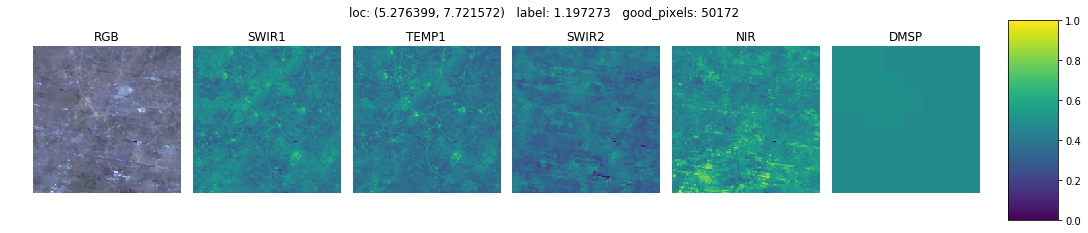

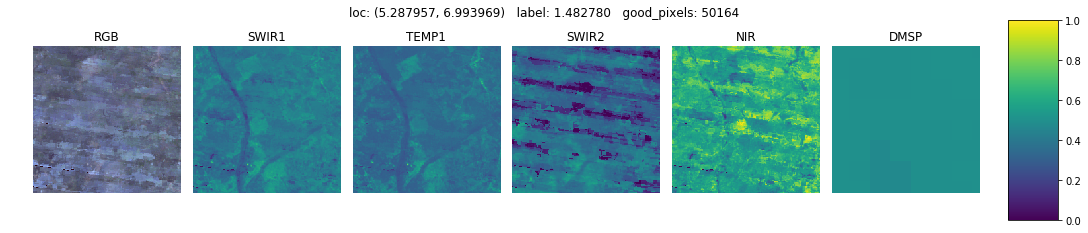

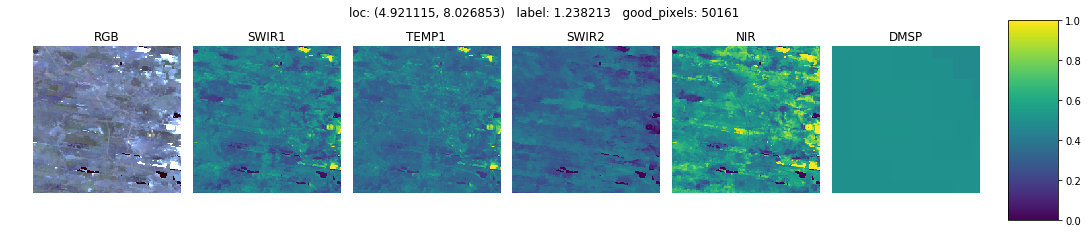

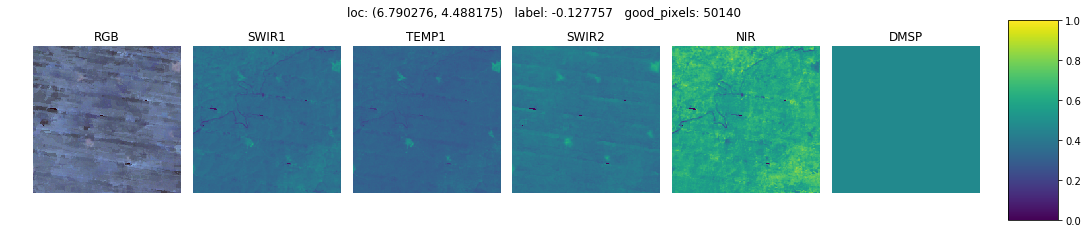

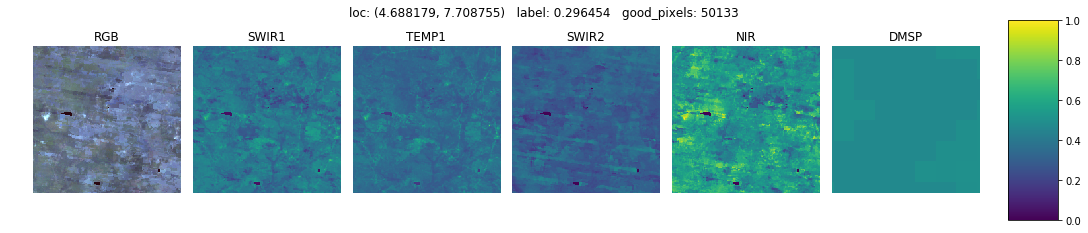

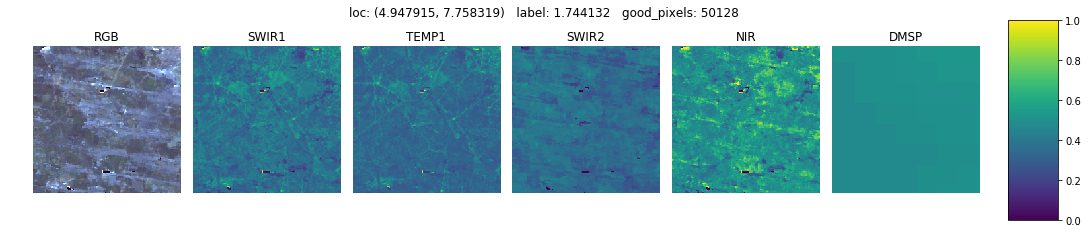

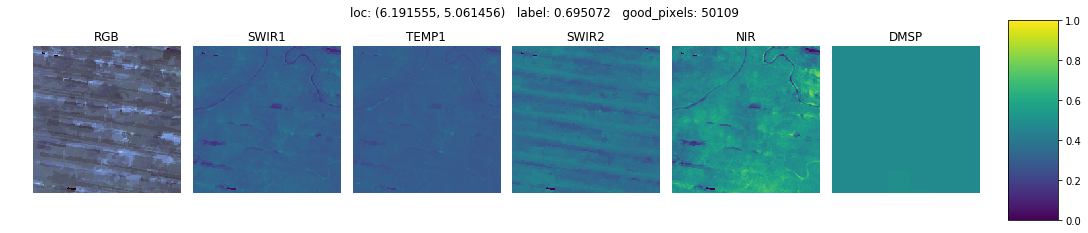

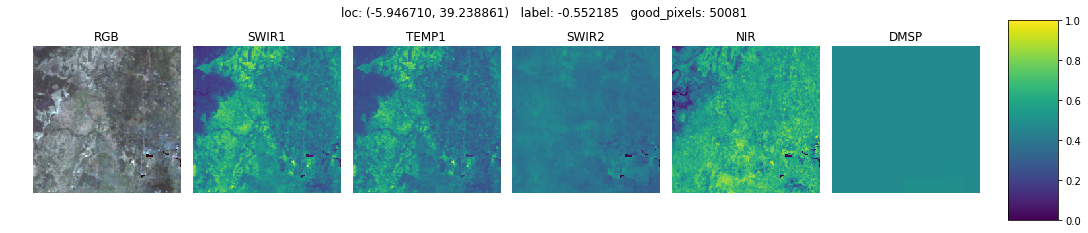

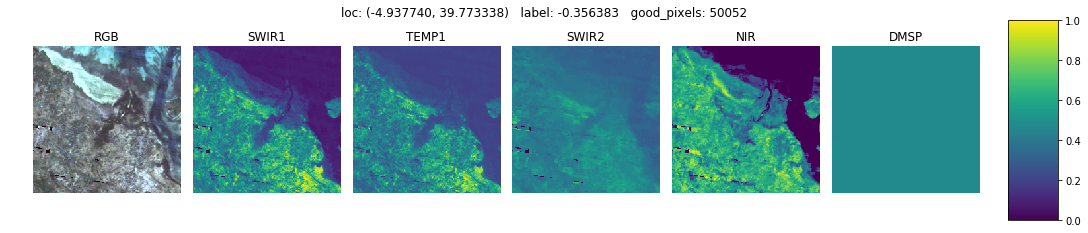

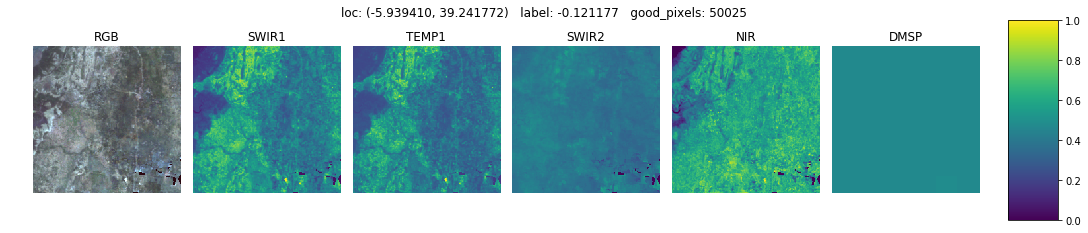

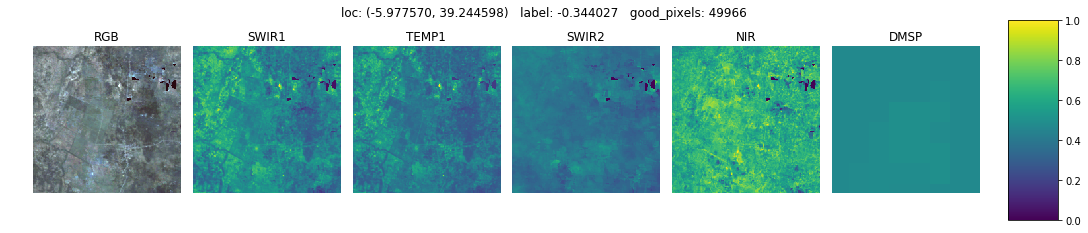

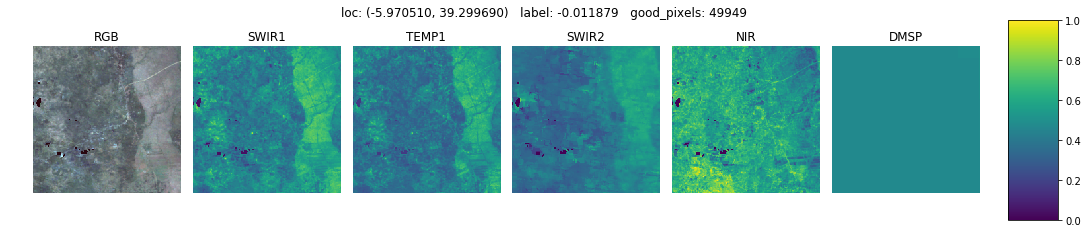

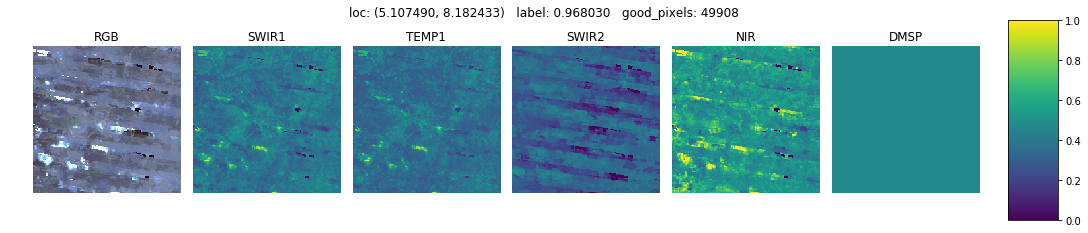

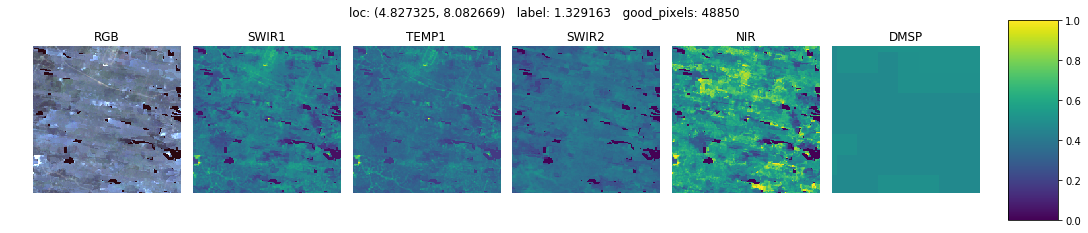

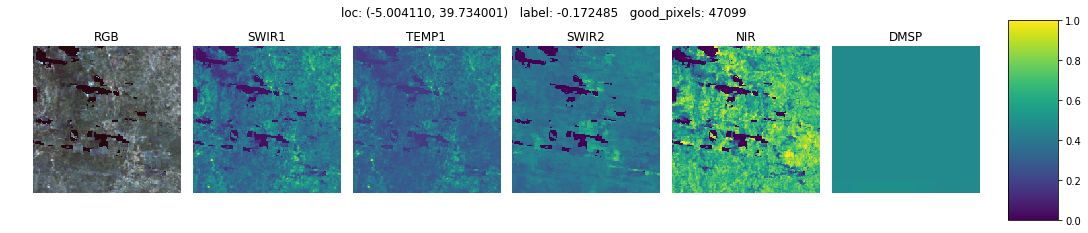

In [17]:
plot_k_top(k_worst, value_str='good_pixels', means=means, stds=stds, negate_value=True)